<a href="https://colab.research.google.com/github/Dahamey/Dahamey.github.io/blob/main/Image_classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
# Load and split dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# class names of the outputs (labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
test_images.shape, test_labels.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
trn_images, val_images, trn_labels, val_labels = train_test_split(train_images, train_labels, stratify =train_labels, test_size= 0.17)

In [6]:
trn_images.shape, trn_labels.shape

((41500, 32, 32, 3), (41500, 1))

In [7]:
val_images.shape, val_labels.shape

((8500, 32, 32, 3), (8500, 1))

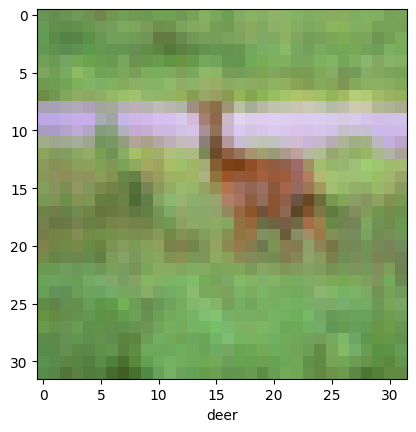

In [8]:
# Let's look at one image :
IMG_INDEX = 7 # We can change this to look at other images

plt.imshow(trn_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[trn_labels[IMG_INDEX][0]])
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. The idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [9]:
model = models.Sequential()

# The convolutional phase

#layer 1
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (32,32,3)))

#layer 2
model.add(layers.MaxPooling2D((2,2)))

# Other layers
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [10]:
# let's have a look at our model so far
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

After looking at the summary we notice that the depth (4th coordonate) of our image increases but the spacial dimensions (the first coodonates) reduce drastically.

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.


In [11]:
# The classifier phase

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))

#output layer
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, followed by the final output layer of 10 neurons (one for each class).



##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take some time*

In [13]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])

history = model.fit(trn_images, trn_labels, epochs = 10,
                    validation_data = (val_images, val_labels))

Epoch 1/10
1297/1297 [==============================] - 75s 56ms/step - loss: 1.5740 - accuracy: 0.4228 - val_loss: 1.2928 - val_accuracy: 0.5322
Epoch 2/10
1297/1297 [==============================] - 56s 43ms/step - loss: 1.2180 - accuracy: 0.5689 - val_loss: 1.1157 - val_accuracy: 0.6058
Epoch 3/10
1297/1297 [==============================] - 58s 45ms/step - loss: 1.0629 - accuracy: 0.6240 - val_loss: 1.0633 - val_accuracy: 0.6275
Epoch 4/10
1297/1297 [==============================] - 57s 44ms/step - loss: 0.9576 - accuracy: 0.6617 - val_loss: 1.0082 - val_accuracy: 0.6513
Epoch 5/10
1297/1297 [==============================] - 58s 45ms/step - loss: 0.8745 - accuracy: 0.6911 - val_loss: 0.9422 - val_accuracy: 0.6741
Epoch 6/10
1297/1297 [==============================] - 69s 53ms/step - loss: 0.8066 - accuracy: 0.7159 - val_loss: 0.9182 - val_accuracy: 0.6847
Epoch 7/10
1297/1297 [==============================] - 72s 56ms/step - loss: 0.7484 - accuracy: 0.7363 - val_loss: 0.9165 -

##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(test_acc)

313/313 - 6s - loss: 0.9288 - accuracy: 0.6881 - 6s/epoch - 19ms/step
0.6880999803543091


We get an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.

##Working with Small Datasets
In the situation where we don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.

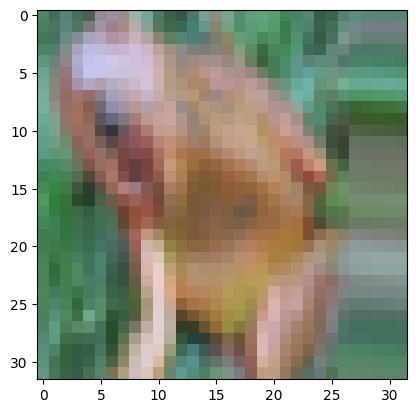

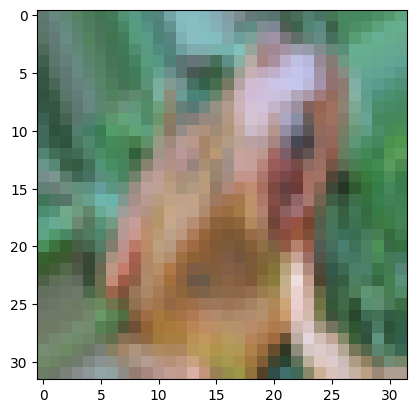

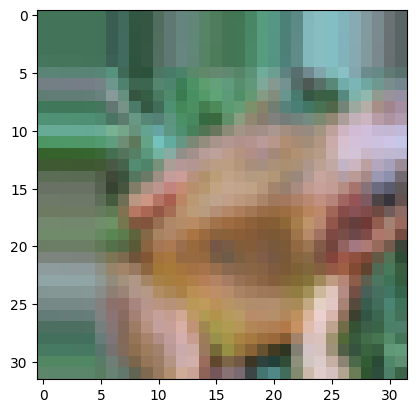

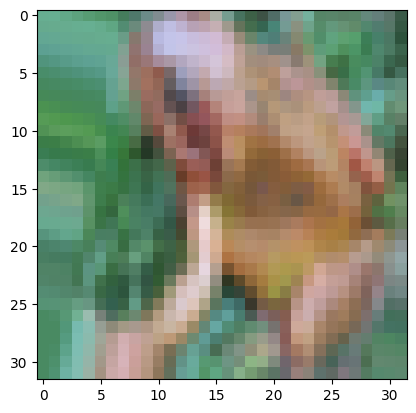

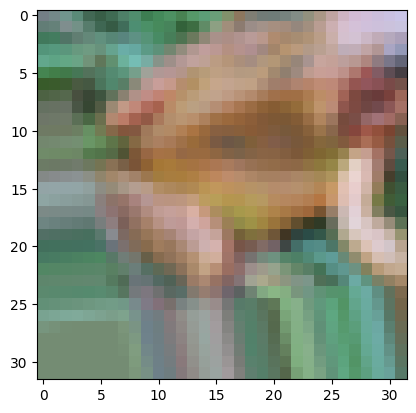

In [15]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = trn_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

###Pretrained Models
Notice that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this.

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convolutional Neural Network already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



###Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features like lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers then we can look for only features relevant to our very specific problem.



##Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning*




In [15]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the module tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



In [16]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing and 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    "cats_vs_dogs",
    split = ["train[:80%]", "train[80%:90%]", "train[90%:]"],
    with_info = True,
    as_supervised= True,
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


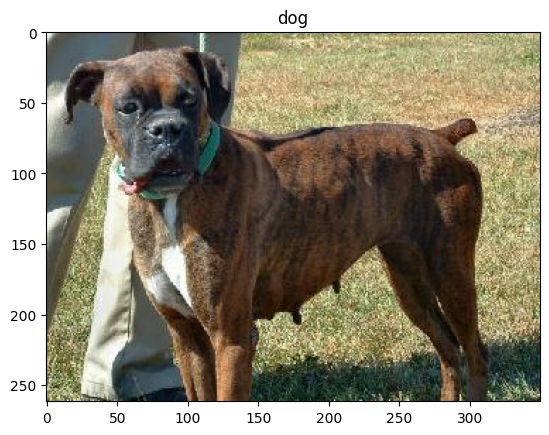

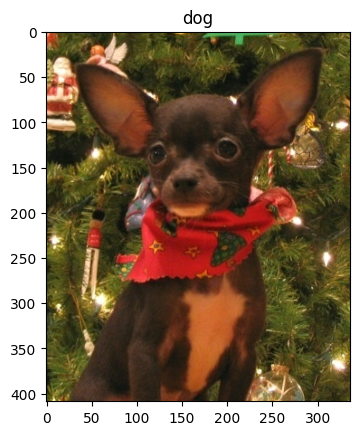

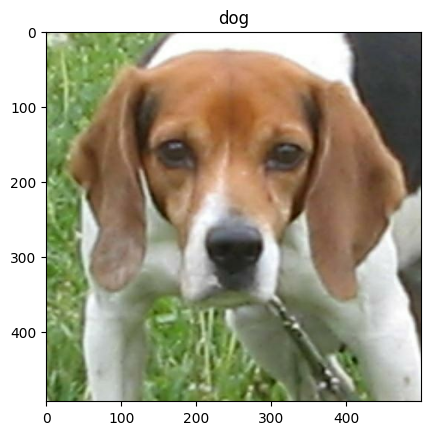

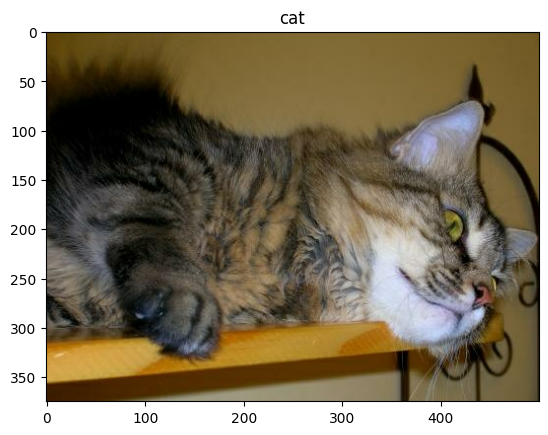

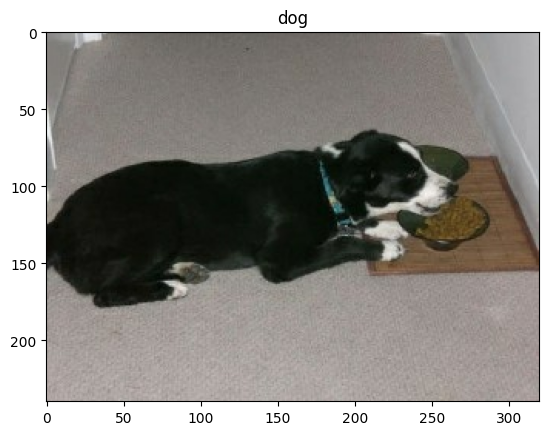

In [18]:
# creates a function object that we can use to get labels
get_label_name = metadata.features["label"].int2str

# display 2 images from the dataset
for image, label in raw_train.take(5) :
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [19]:
IMG_SIZE = 160 # All the images will be resized to 160x160

def format_example(image, label) :
  """
  returns an image that is reshaped to IMG_SIZE
  """
  # convert every pixel in our image into 32, because there could be integers
  image = tf.cast(image, tf.float32)
  # 255/2 = 127.5
  image = (image / 127.5) -1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [20]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

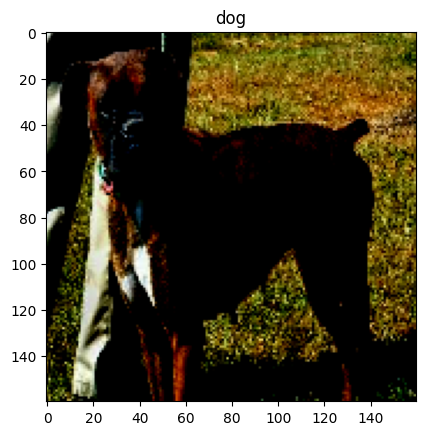

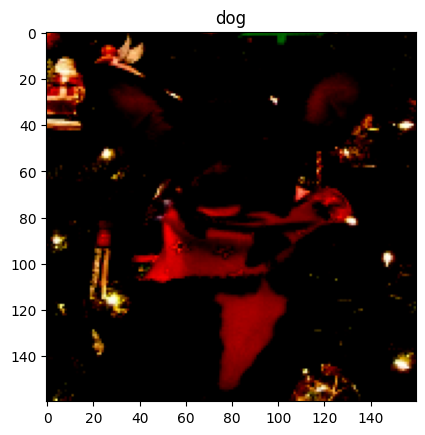

In [21]:
for image, label in train.take(2) :
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

# Finally we will shuffle and batch the images.

In [22]:
BATCH_SIZE = 32
SHUFFLLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [24]:
# If we look at the shape of original and new images :

for img, label in raw_train.take(2) :
  print("Original shape : ", img.shape)

for img, label in train.take(2) :
  print("New shape : ", img.shape)

Original shape :  (262, 350, 3)
Original shape :  (409, 336, 3)
New shape :  (160, 160, 3)
New shape :  (160, 160, 3)


###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).



In [25]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [26]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of different filters/features.

In [27]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.

In [28]:
base_model.trainable = False

In [29]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  

In [31]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the prediction layer that will be a single dense neuron. We can do this because we only have two classes to predict for.

In [34]:
prediction_layer = tf.keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [35]:
model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [38]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ["accuracy"])

In [39]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps )

20/20 [==============================] - 14s 532ms/step - loss: 0.6493 - accuracy: 0.5531


In [41]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

acc = history.history["accuracy"]
print(acc)

Epoch 1/3
582/582 [==============================] - 406s 687ms/step - loss: 0.1957 - accuracy: 0.9162 - val_loss: 0.0904 - val_accuracy: 0.9686
Epoch 2/3
582/582 [==============================] - 369s 629ms/step - loss: 0.0723 - accuracy: 0.9743 - val_loss: 0.0657 - val_accuracy: 0.9772
Epoch 3/3
582/582 [==============================] - 373s 637ms/step - loss: 0.0580 - accuracy: 0.9785 - val_loss: 0.0573 - val_accuracy: 0.9798
[0.9162278175354004, 0.9743148684501648, 0.9784524440765381]


## Saving and loading the model

In [42]:
# we can save the model and reload it at anytime in the future

# Saving the model
model.save("dogs_vs_cats.h5")

# Loading the model
#new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Object Detection
To learn how we can perform object detection and recognition with tensorflow :
https://github.com/tensorflow/models/tree/master/research/object_detection



##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.